# Data exploration and visualization

In [1]:
'''Importing necessary libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('..\Data\Car_Prices_Poland_Kaggle.csv').drop('Unnamed: 0', axis=1)
data.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
data.shape

(117927, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.0+ MB


In [5]:
data.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [6]:
data.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

There are some null values in generation column.

Text(0.5, 1.0, 'Distribution of price')

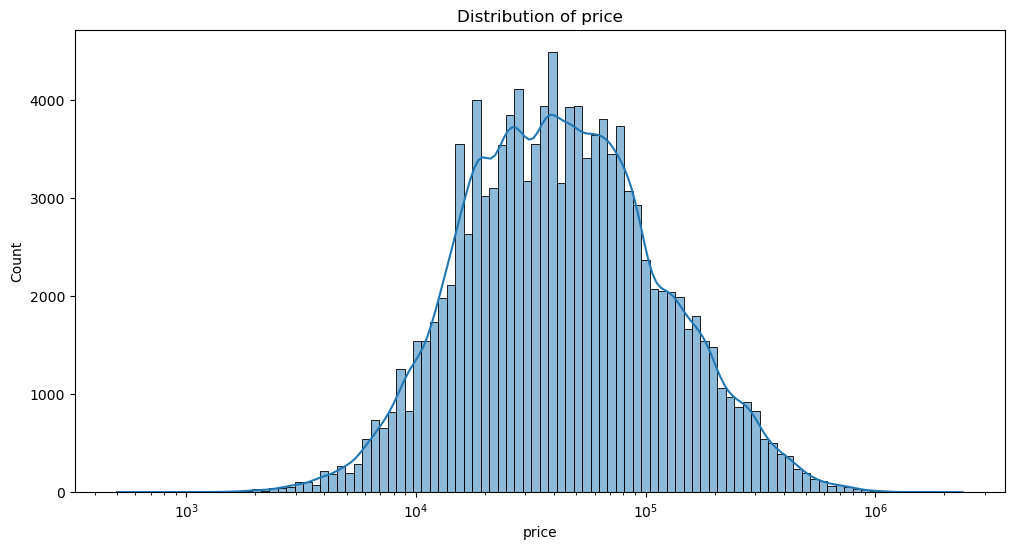

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=data['price'], kde=True, bins=100, log_scale=True)
plt.title("Distribution of price")

# Correlations between features

Text(0.5, 1.0, 'Correlation map')

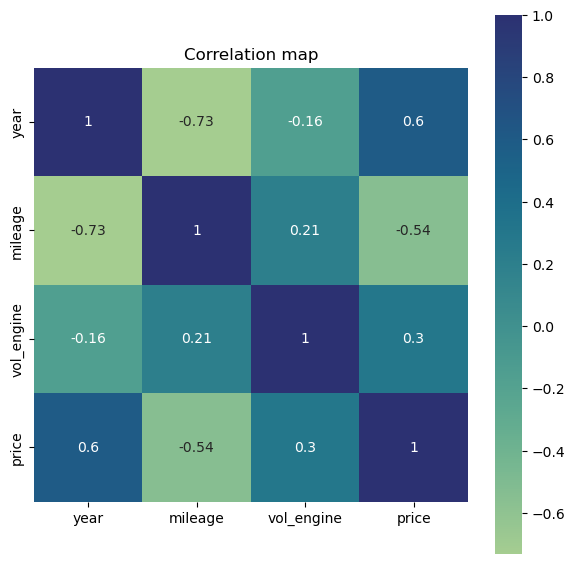

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(data=data.corr(), square=True, annot=True, cmap='crest')
plt.title("Correlation map")

The correlations between features are what we might expect. Let's see how price (target) is related to other features:
- newer cars are more expensive
- cars with higher mileage are cheaper
- cars with larger engine volume are slightly more expensive

# Distribution of features

Text(0.5, 1.0, 'Types of fuel')

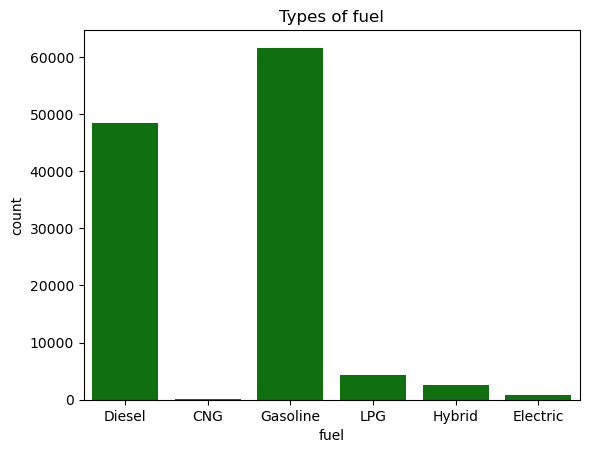

In [9]:
sns.countplot(data=data, x='fuel', color='g')
plt.title("Types of fuel")

Text(0.5, 1.0, 'Most popular marks')

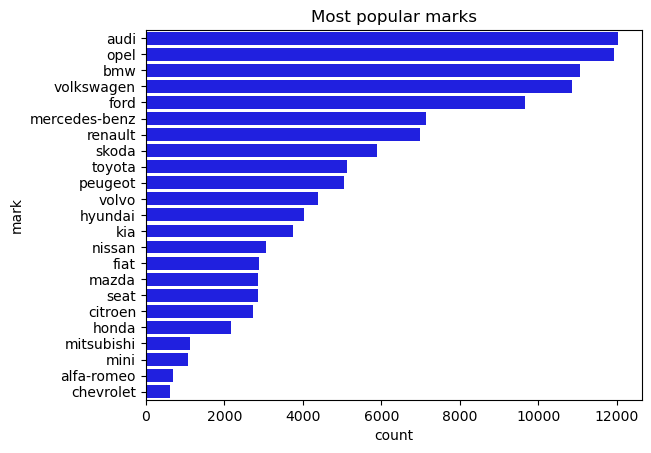

In [10]:
sns.countplot(data=data, y='mark', color='b',
            order=data['mark'].value_counts().sort_values(ascending=False).index)
plt.title("Most popular marks")

In [11]:
print("Unique models per mark")
data.groupby(by='mark')['model'].nunique()

Unique models per mark


mark
alfa-romeo        5
audi             27
bmw              25
chevrolet         4
citroen          12
fiat             11
ford             27
honda             5
hyundai          10
kia              12
mazda            10
mercedes-benz    27
mini              5
mitsubishi        6
nissan           11
opel             20
peugeot          12
renault          19
seat              9
skoda            12
toyota           14
volkswagen       32
volvo            13
Name: model, dtype: int64

In [20]:
data['generation_name'].nunique()

364

There are lots of different models and generations. We will have to figure out how to encode them.

(One Hot Encoding might not be the best idea for hundreds of unique models)

Text(0.5, 1.0, 'Distribution of car year of production')

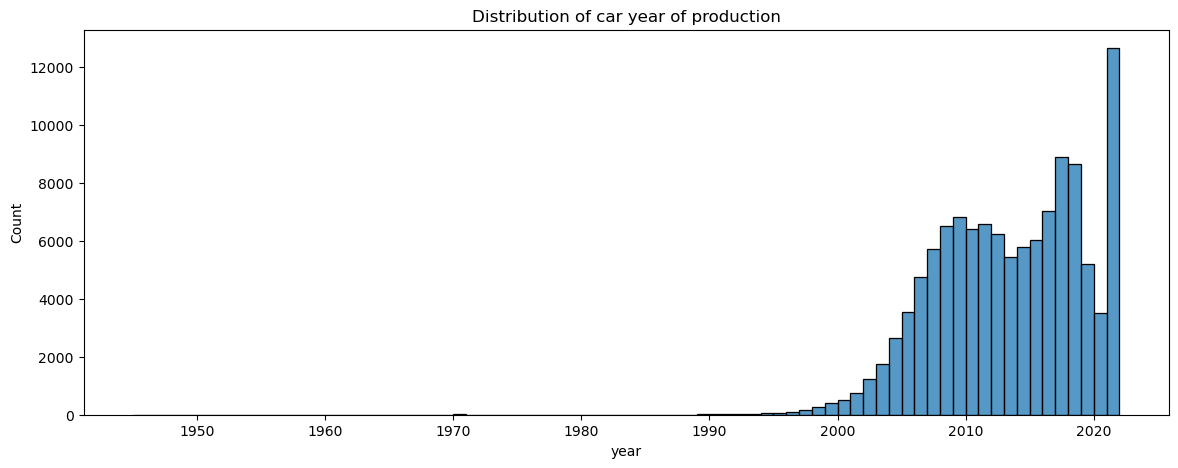

In [12]:
plt.figure(figsize=(14,5))
sns.histplot(data['year'], bins=(data['year'].max() - data['year'].min()))
plt.title("Distribution of car year of production")

Text(0.5, 1.0, 'Number of cars per province')

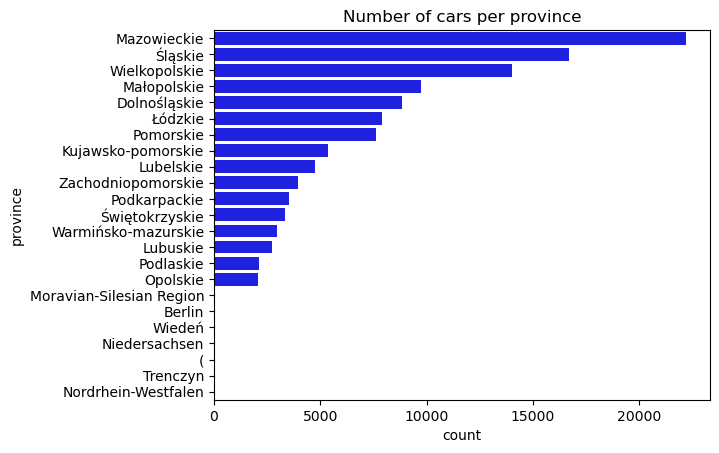

In [13]:
sns.countplot(data=data, y='province', color='b',
            order=data['province'].value_counts().sort_values(ascending=False).index)
plt.title("Number of cars per province")

In [14]:
data[data['province'] == '(']

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
73436,toyota,rav4,gen-iv-2012,2014,189000,1998,Diesel,(),(,62900


"(" in province column is probably a mistake, later we will either replace it with some value or drop the record.

In [15]:
data['city'].nunique()

4427

We will probably drop the "city" column, it has too many unique values and repeats information about location ("province" should be enough).

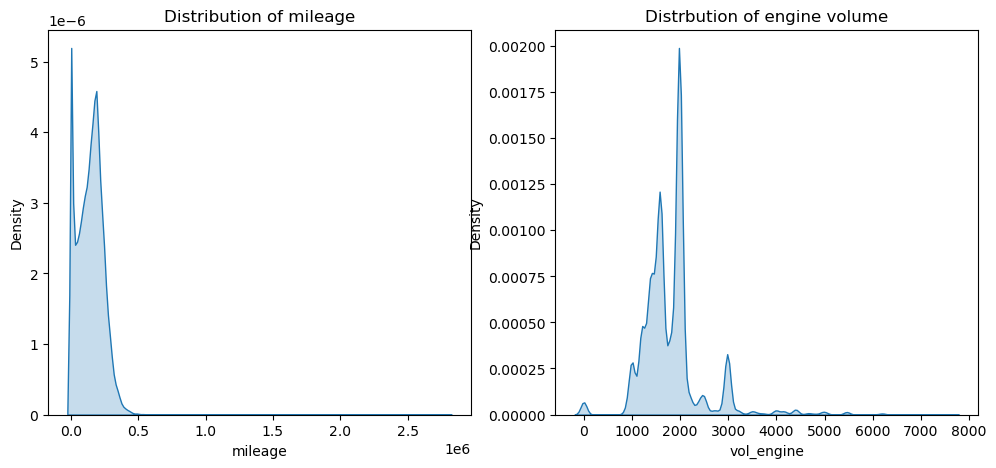

In [16]:
plt.figure(figsize=(12,5))

titles = ["Distribution of mileage","Distrbution of engine volume"]

for i, col in enumerate(['mileage','vol_engine']):
    plt.subplot(1,2,i+1)
    sns.kdeplot(data=data[col], fill=True)
    plt.title(titles[i])
